In [1]:
import pandas as pd
from ollama import Client
from tqdm import tqdm

In [2]:
df = pd.read_csv('experiments/document-classification/task1report.csv')

In [3]:
df.head()

,Model,Dataset,Language,Task,Precision,Recall,F1,Accuracy
0,gemma2,Tagesschau,de,coarse,84.88,81.94,82.01,81.94
1,llama3.1,Tagesschau,de,coarse,83.13,74.79,76.01,74.79
2,mistral-nemo,Tagesschau,de,coarse,83.55,77.62,78.92,77.62
3,gemma2,BBC,en,coarse,76.59,76.58,74.85,76.58
4,llama3.1,BBC,en,coarse,71.07,70.29,65.64,70.29


In [4]:
# drop columns Dataset and Language
df = df.drop(columns=['Dataset', 'Language'])
df.head()

,Model,Task,Precision,Recall,F1,Accuracy
0,gemma2,coarse,84.88,81.94,82.01,81.94
1,llama3.1,coarse,83.13,74.79,76.01,74.79
2,mistral-nemo,coarse,83.55,77.62,78.92,77.62
3,gemma2,coarse,76.59,76.58,74.85,76.58
4,llama3.1,coarse,71.07,70.29,65.64,70.29


In [6]:
# aggregate by task and model, compute mean
df2 = df.groupby(['Task', 'Model']).mean().reset_index().round(2)
df2

Precision     Recall         F1   Accuracy
Task        Model                                                   
coarse      gemma2        67.196667  65.420000  64.853333  65.420000
            llama3.1      64.326667  59.360000  58.073333  59.360000
            mistral-nemo  64.393333  62.003333  61.283333  62.003333
fine        gemma2        70.500000  62.000000  63.000000  62.450000
            llama3.1      57.500000  36.000000  34.000000  35.935000
            mistral-nemo  66.500000  53.500000  55.000000  53.565000
multi-label gemma2        55.480000  52.230000  52.350000   8.580000
            llama3.1      52.120000  42.380000  43.950000   6.880000
            mistral-nemo  57.510000  49.620000  51.050000   8.580000

In [7]:
# round to 2 decimal places
df2 = df2.round(2)

In [8]:
df2

Precision  Recall     F1  Accuracy
Task        Model                                           
coarse      gemma2            67.20   65.42  64.85     65.42
            llama3.1          64.33   59.36  58.07     59.36
            mistral-nemo      64.39   62.00  61.28     62.00
fine        gemma2            70.50   62.00  63.00     62.45
            llama3.1          57.50   36.00  34.00     35.94
            mistral-nemo      66.50   53.50  55.00     53.56
multi-label gemma2            55.48   52.23  52.35      8.58
            llama3.1          52.12   42.38  43.95      6.88
            mistral-nemo      57.51   49.62  51.05      8.58

In [9]:
df2.to_csv('experiments/document-classification/task1report_aggregated.csv')

In [5]:
df = pd.read_csv('experiments/document-classification/single-label/single_label_tagesschau.report.csv')

In [9]:
df

,Unnamed: 0,inland,ausland,wirtschaft,wissen,accuracy,macro avg,weighted avg
0,precision,0.568022,0.911041,0.946028,0.519328,0.804025,0.736105,0.847393
1,recall,0.907558,0.909055,0.567686,0.699095,0.804025,0.770848,0.804025
2,f1-score,0.698726,0.910047,0.709575,0.595950,0.804025,0.728574,0.805549
3,support,1601.000000,5047.000000,2748.000000,442.000000,0.804025,9838.000000,9838.000000


In [21]:
accuracy = round(df["accuracy"][0], 2)
precision, recall, f1, support = [round(x, 2) for x in df["weighted avg"].tolist()]

In [24]:
df2 = pd.DataFrame({
    "model": ["gemma2"],
    "dataset": ["tagesschau"],
    "language": ["de"],
    "task": ["document-classification-single-label"],
    "accuracy": [accuracy],
    "precision": [precision],
    "recall": [recall],
    "f1": [f1],
})

In [25]:
df2

,model,dataset,language,task,accuracy,precision,recall,f1
0,gemma2,tagesschau,de,document-classification-single-label,0.8,0.85,0.8,0.81


In [26]:
df2.append(df2)

/tmp/ipykernel_2689074/2176288206.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2.append(df2)


,model,dataset,language,task,accuracy,precision,recall,f1
0,gemma2,tagesschau,de,document-classification-single-label,0.8,0.85,0.8,0.81
0,gemma2,tagesschau,de,document-classification-single-label,0.8,0.85,0.8,0.81


In [3]:
df = pd.read_parquet("datasets/bbc/bbc_cleaned.parquet")

In [4]:
df.head()

,title,published_date,description,section,content,link,count,tags,tags_len,main_tag,sub_tag
0,Kabul attack: Guests use sheets to escape hote...,2018-01-21,Guests used sheets to climb down from balconie...,None,Guests used sheets to climb down from balconie...,http://www.bbc.co.uk/news/world-asia-42764971,5,"[world, asia]",2,world,asia
1,Rashan Charles death: Met Police officer not f...,2018-01-21,Rashan Charles died as he tried to swallow a p...,London,Rashan Charles died after being apprehended by...,http://www.bbc.co.uk/news/uk-england-london-42...,5,"[uk, england, london]",3,uk,england
2,Marco Silva: Watford blame Everton as they sac...,2018-01-21,"Watford sack manager Marco Silva, blaming Ever...",None,"Watford have sacked manager Marco Silva, blami...",http://www.bbc.co.uk/sport/football/42765881,6,"[sport, football]",2,sport,football
3,North Korea Moranbong girl band leader heads O...,2018-01-21,The team is on a landmark visit to inspect cul...,Asia,"Hyon Song-wol, pictured centre, was the star a...",http://www.bbc.co.uk/news/world-asia-42765105,5,"[world, asia]",2,world,asia
4,Australian Open: Kyle Edmund reaches first Gra...,2018-01-21,Britain's Kyle Edmund powers into a first Gran...,None,Last updated on .From the section Tennis\n\nCo...,http://www.bbc.co.uk/sport/tennis/42764304,6,"[sport, tennis]",2,sport,tennis


In [6]:
df["main_tag"].unique()

array(['world', 'uk', 'sport', 'misc'], dtype=object)

In [ ]:
# 

In [8]:
df = pd.read_parquet("datasets/tagesschau/tagesschau_cleaned.parquet")

In [61]:
df.head()

,date,headline,short_headline,short_text,article,link,main_tag,sub_tag
0,2023-04-27,Türkei-Wahl in Deutschland startet,"1,5 Millionen Stimmberechtigte","Etwa 1,5 Millionen türkische Staatsbürger in D...","Etwa 1,5 Millionen türkische Staatsbürger in D...",/ausland/europa/erdogan-wahlkampfpause-gesundh...,ausland,europa
1,2023-04-27,Bolsonaro bestreitet Verwicklung in Regierungs...,Brasilien,Brasiliens Ex-Präsident Bolsonaro hat eine Ver...,Brasiliens Ex-Präsident Bolsonaro hat eine Ver...,/ausland/amerika/bolsonaro-brasilien-sturm-reg...,ausland,amerika
2,2023-04-27,"Streiten, ob Hilfe wirklich richtig ist",Afghanistan-Politik der Bundesregierung,Deutschland hat seine Finanzhilfen für Afghani...,Deutschland hat seine Finanzhilfen für Afghani...,/inland/innenpolitik/afghanistan-deutschland-h...,inland,innenpolitik
3,2023-04-27,Republikaner machen Druck auf Biden,US-Haushaltsstreit,Die Republikaner im US-Kongress wollen Präside...,Die Republikaner im US-Kongress wollen Präside...,/ausland/amerika/usa-haushaltsstreit-biden-rep...,ausland,amerika
7,2023-04-27,Wie sich Twitter unter Elon Musk verändert hat,Ein halbes Jahr nach der Übernahme,"""Der Vogel ist befreit"", twitterte Elon Musk v...","""Der Vogel ist befreit"", twitterte Elon Musk v...",/wirtschaft/unternehmen/twitter-halbes-jahr-mu...,wirtschaft,unternehmen


In [62]:
df[0:50]

,date,headline,short_headline,short_text,article,link,main_tag,sub_tag
0,2023-04-27,Türkei-Wahl in Deutschland startet,"1,5 Millionen Stimmberechtigte","Etwa 1,5 Millionen türkische Staatsbürger in D...","Etwa 1,5 Millionen türkische Staatsbürger in D...",/ausland/europa/erdogan-wahlkampfpause-gesundh...,ausland,europa
1,2023-04-27,Bolsonaro bestreitet Verwicklung in Regierungs...,Brasilien,Brasiliens Ex-Präsident Bolsonaro hat eine Ver...,Brasiliens Ex-Präsident Bolsonaro hat eine Ver...,/ausland/amerika/bolsonaro-brasilien-sturm-reg...,ausland,amerika
2,2023-04-27,"Streiten, ob Hilfe wirklich richtig ist",Afghanistan-Politik der Bundesregierung,Deutschland hat seine Finanzhilfen für Afghani...,Deutschland hat seine Finanzhilfen für Afghani...,/inland/innenpolitik/afghanistan-deutschland-h...,inland,innenpolitik
3,2023-04-27,Republikaner machen Druck auf Biden,US-Haushaltsstreit,Die Republikaner im US-Kongress wollen Präside...,Die Republikaner im US-Kongress wollen Präside...,/ausland/amerika/usa-haushaltsstreit-biden-rep...,ausland,amerika
7,2023-04-27,Wie sich Twitter unter Elon Musk verändert hat,Ein halbes Jahr nach der Übernahme,"""Der Vogel ist befreit"", twitterte Elon Musk v...","""Der Vogel ist befreit"", twitterte Elon Musk v...",/wirtschaft/unternehmen/twitter-halbes-jahr-mu...,wirtschaft,unternehmen
9,2023-04-27,US-Autorin Carroll wirft Trump Vergewaltigung vor,Aussage vor Gericht,Die US-Journalistin und Autorin Carroll hat vo...,Die US-Journalistin und Autorin Carroll hat vo...,/ausland/amerika/trump-anklage-vergewaltigung-...,ausland,amerika
11,2023-04-27,Deutsche Bank will weitere Stellen streichen,Nach Milliardengewinn,Deutschlands größtes Geldhaus hat überraschend...,Deutschlands größtes Geldhaus hat überraschend...,/wirtschaft/finanzen/deutsche-bank-stellenstre...,wirtschaft,finanzen
12,2023-04-27,Wer ist der Viessmann-Käufer?,US-Konzern Carrier Global,Der Heizungshersteller Viessmann verkauft sein...,Der Heizungshersteller Viessmann verkauft sein...,/wirtschaft/unternehmen/carrier-global-viessma...,wirtschaft,unternehmen
13,2023-04-27,Was der Bundespräsident in der Arktis macht,Besuch in Kanada,Zum Abschluss seines Kanada-Besuchs ist Bundes...,Zum Abschluss seines Kanada-Besuchs ist Bundes...,/inland/innenpolitik/steinmeier-arktis-100.html,inland,innenpolitik
15,2023-04-27,Welche Lehren die USA aus der Pandemie ziehen,Untersuchungsbericht vorgelegt,Was haben die USA aus der Corona-Pandemie gele...,Was haben die USA aus der Corona-Pandemie gele...,/ausland/amerika/lehren-aus-covid-100.html,ausland,amerika


In [14]:
single_labels = list(df["main_tag"].unique())
single_labels

['ausland', 'inland', 'wirtschaft', 'wissen']

In [52]:
label2id = {label: i for i, label in enumerate(single_labels)}

In [17]:
prediction = {
    "Inland": "Nachrichten über Deutschland",
    "Ausland": "Nachrichten über das Ausland",
    "Wirtschaft": "Nachrichten über die Wirtschaft",
    "Wissen": "Nachrichten über Wissenschaft",
}
labels_string = "\n".join([f"{k}: {v}" for k, v in prediction.items()])
print(labels_string)

Inland: Nachrichten über Deutschland
Ausland: Nachrichten über das Ausland
Wirtschaft: Nachrichten über die Wirtschaft
Wissen: Nachrichten über Wissenschaft


In [28]:
client = Client(host='http://localhost:19290')

In [27]:
[x["name"] for x in client.list()["models"]]

['llama3.1:8b-instruct-fp16']

In [25]:
client.pull("llama3.1:8b-instruct-fp16")

{'status': 'success'}

In [26]:
response = client.chat(model='llama3.1:8b-instruct-fp16', messages=[
    {
        'role': 'system',
        'content': "You are children!",
    },
    {
    'role': 'user',
    'content': "Hi how is it going?",
    },
])
response

KeyboardInterrupt: 

In [25]:
news_article = df["article"].tolist()[0]
news_article

'Etwa 1,5 Millionen türkische Staatsbürger in Deutschland können von heute an ihre Stimme für die Parlaments- und Präsidentenwahlen in der Türkei abgeben. Präsident Erdogan sagte wegen gesundheitlicher Probleme weitere Wahlkampftermine ab. Ob der türkische Präsident Recep Tayyip Erdogan wiedergewählt wird, können etwa 1,5 Millionen Türken in Deutschland mitentscheiden: Bis zum 9. Mai sind sie dazu aufgerufen, ihre Stimme in einem der 26 Wahllokale in der Bundesrepublik abzugeben. In der Türkei finden die Parlaments- und Präsidentenwahlen erst am 14. Mai statt.   Erreicht dann keiner der Präsidentschaftskandidaten mehr als 50 Prozent, geht es am 28. Mai in die Stichwahl. Bei den vergangenen Wahlen vor fünf Jahren hatte es Streit um Wahlkampfauftritte türkischer Politiker in Deutschland gegeben. Ein ähnlicher Konflikt wird diesmal nicht erwartet. Inzwischen sind solche Auftritte ausländischer Politiker drei Monate vor den Abstimmungen in ihren Ländern nicht mehr erlaubt.   Buschmann warn

In [26]:
label = df["main_tag"].tolist()[0]
label

'ausland'

In [27]:
system_prompt = 'Du bist ein System zur Unterstützung bei der Analyse großer Textmengen. In diesem Projekt "Tagesschau" geht es um "Eine Analyse der Themen in Deutschland basierend auf den Nachrichten & Artikeln der Tageschau".'


print(user_prompt)


Bitte klassifiziere den folgenden Artikel in genau einen der folgenden Kategorien: 
Inland: Nachrichten über Deutschland
Ausland: Nachrichten über das Ausland
Wirtschaft: Nachrichten über die Wirtschaft
Wissen: Nachrichten über Wissenschaft.

Bitte anworte im Format
Kategorie: <Kategorie>
Begründung: <Begründung>

Artikel:
Etwa 1,5 Millionen türkische Staatsbürger in Deutschland können von heute an ihre Stimme für die Parlaments- und Präsidentenwahlen in der Türkei abgeben. Präsident Erdogan sagte wegen gesundheitlicher Probleme weitere Wahlkampftermine ab. Ob der türkische Präsident Recep Tayyip Erdogan wiedergewählt wird, können etwa 1,5 Millionen Türken in Deutschland mitentscheiden: Bis zum 9. Mai sind sie dazu aufgerufen, ihre Stimme in einem der 26 Wahllokale in der Bundesrepublik abzugeben. In der Türkei finden die Parlaments- und Präsidentenwahlen erst am 14. Mai statt.   Erreicht dann keiner der Präsidentschaftskandidaten mehr als 50 Prozent, geht es am 28. Mai in die Stichwa

In [28]:
response = client.chat(model='gemma2', messages=[
  {
      'role': 'system',
      'content': system_prompt,
  },
  {
    'role': 'user',
    'content': user_prompt,
  },
])

In [33]:
print(parse_german_response(response["message"]["content"]))

('Ausland', 'Der Artikel handelt von den bevorstehenden Wahlen in der Türkei, einschließlich des Abstimmungsprozesses für türkische Staatsbürger in Deutschland und der gesundheitlichen Probleme von Präsident Erdogan.  Es konzentriert sich auf politische Ereignisse im Ausland.')


In [32]:
def parse_german_response(response):
    # check that the answer contains line break
    if "\n" not in response:
        return None, "Die Antwort muss mindestens ein Umbruch enthalten."
    
    components = response.split("\n")

    # check that the answer contains at least 2 lines
    if len(components) < 2:
        return None, "Die Antwort muss mindestens zwei Zeilen enthalten."

    # check that the answer starts with "Kategorie:"
    if not components[0].startswith("Kategorie:"):
        return None, "Die Antwort muss mit 'Kategorie:' beginnen."

    # check that the answer contains "Begründung:"
    if not components[1].startswith("Begründung:"):
        return None, "Die Antwort muss 'Begründung:' enthalten."

    # extract the category
    category = components[0].split(":")[1].strip()

    # extract the reason
    reason = components[1].split(":")[1].strip()

    return category, reason

In [40]:
eval_df = df.sample(n=10000, random_state=42)
articles = eval_df["article"].to_list()
prediction = eval_df["main_tag"].to_list()

In [39]:
assert len(articles) == 10000
assert len(articles) == len(prediction)

In [42]:
predictions = []
reasons = []
for article, label in tqdm(zip(articles, prediction), desc="Evaluating"):
    user_prompt = f"""
    Bitte klassifiziere den folgenden Artikel in genau einen der folgenden Kategorien: 
    {labels_string}.

    Bitte anworte im Format
    Kategorie: <Kategorie>
    Begründung: <Begründung>

    Artikel:
    {news_article}
    """

    response = client.chat(model='gemma2', messages=[
      {
          'role': 'system',
          'content': system_prompt,
      },
      {
        'role': 'user',
        'content': user_prompt,
      },
    ])

    category, reason = parse_german_response(response["message"]["content"])
    predictions.append(category)
    reasons.append(reason)

Evaluating: 3039it [1:01:48,  1.22s/it]


KeyboardInterrupt: 

In [43]:
len(predictions), len(reasons)

(3039, 3039)

In [48]:
filtered_reasons = [reason for idx, reason in enumerate(reasons) if predictions[idx] is None]

In [49]:
len(filtered_reasons)

564

In [50]:
filtered_reasons

["Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' enthalten.",
 "Die Antwort muss 'Begründung:' e

In [45]:
# filter out the None values
filtered_predictions = [p for p in predictions if p is not None]
filtered_labels = [l for idx, l in enumerate(prediction[:len(predictions)]) if predictions[idx] is not None]

# count None values
none_count = len(predictions) - len(filtered_predictions)
print(f"None count: {none_count}, None percentage: {none_count / len(predictions) * 100:.2f}%")

None count: 564, None percentage: 18.56%


In [53]:
# do classification report
from sklearn.metrics import classification_report

y_true = [label2id[label] for label in filtered_labels]
y_pred = [label2id[pred.lower()] for pred in filtered_predictions]
print(classification_report(y_true, y_pred, target_names=single_labels))

              precision    recall  f1-score   support

     ausland       0.51      0.80      0.62      1260
      inland       0.15      0.18      0.16       408
  wirtschaft       0.00      0.00      0.00       694
      wissen       0.00      0.00      0.00       113

    accuracy                           0.44      2475
   macro avg       0.16      0.25      0.20      2475
weighted avg       0.28      0.44      0.34      2475



/home/tfischer/micromamba/envs/dwts/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tfischer/micromamba/envs/dwts/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tfischer/micromamba/envs/dwts/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

cm = confusion_matrix(y_true, y_pred)

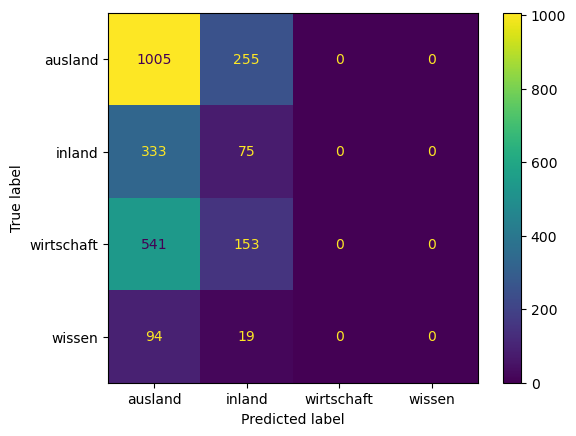

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=single_labels)
disp.plot()

plt.savefig('foo.png')

In [2]:
import pandas as pd

df = pd.read_csv("experiments/tagesschau_single_label.csv")

In [3]:
df

,Article,Label,Prediction,Reason,Message
0,SPD und Grüne in Niedersachsen haben sich im W...,inland,Inland,Das Dokument handelt von Entscheidungen im deu...,Kategorie: Inland\nBegründung: Das Dokument ha...
1,Beim Thema Rechtsextremismus innerhalb der Pol...,inland,Inland,Das Dokument befasst sich mit dem Thema Rechts...,Kategorie: Inland\nBegründung: Das Dokument be...
2,Weltweit läuft gerade der neue Animationsfilm ...,ausland,Ausland,"Das Dokument behandelt den Boykott des Films ""...",Kategorie: Ausland\nBegründung: Das Dokument b...
3,Vor einigen Jahren gab sich der Autor JD Vance...,ausland,Ausland,"Der Artikel handelt von JD Vance, einem republ...",Kategorie: Ausland\nBegründung: Der Artikel ha...
4,Deutschland und Kanada haben ein Abkommen zur ...,ausland,NaN,The answer has to contain 'Begründung:'.,Kategorie: Inland\n\nBegründung: Das Dokument ...
5,Der Bundestag hat die Mandate für die Bundeswe...,inland,Inland,Das Dokument handelt von Entscheidungen des de...,Kategorie: Inland\nBegründung: Das Dokument ha...
6,Auf dem Bundesparteitag wählt die AfD eine neu...,inland,Inland,Der Artikel handelt von einem Bundesparteitag ...,Kategorie: Inland\nBegründung: Der Artikel han...
7,Eigentlich ist die NATO gerade so geeint wie l...,ausland,Ausland,Das Dokument befasst sich mit den Verhandlunge...,Kategorie: Ausland\nBegründung: Das Dokument b...
8,Erstmals seit drei Jahren sind die Außenminist...,ausland,Ausland,Das Dokument berichtet über Gespräche zwischen...,Kategorie: Ausland\nBegründung: Das Dokument b...
9,Vor allem im Osten der Ukraine wird derzeit he...,ausland,Ausland,Das Dokument handelt von den aktuellen Kampfha...,Kategorie: Ausland\nBegründung: Das Dokument h...


In [4]:
df_filtered = df[df["Prediction"].notna()]
df_filtered

,Article,Label,Prediction,Reason,Message
0,SPD und Grüne in Niedersachsen haben sich im W...,inland,Inland,Das Dokument handelt von Entscheidungen im deu...,Kategorie: Inland\nBegründung: Das Dokument ha...
1,Beim Thema Rechtsextremismus innerhalb der Pol...,inland,Inland,Das Dokument befasst sich mit dem Thema Rechts...,Kategorie: Inland\nBegründung: Das Dokument be...
2,Weltweit läuft gerade der neue Animationsfilm ...,ausland,Ausland,"Das Dokument behandelt den Boykott des Films ""...",Kategorie: Ausland\nBegründung: Das Dokument b...
3,Vor einigen Jahren gab sich der Autor JD Vance...,ausland,Ausland,"Der Artikel handelt von JD Vance, einem republ...",Kategorie: Ausland\nBegründung: Der Artikel ha...
5,Der Bundestag hat die Mandate für die Bundeswe...,inland,Inland,Das Dokument handelt von Entscheidungen des de...,Kategorie: Inland\nBegründung: Das Dokument ha...
6,Auf dem Bundesparteitag wählt die AfD eine neu...,inland,Inland,Der Artikel handelt von einem Bundesparteitag ...,Kategorie: Inland\nBegründung: Der Artikel han...
7,Eigentlich ist die NATO gerade so geeint wie l...,ausland,Ausland,Das Dokument befasst sich mit den Verhandlunge...,Kategorie: Ausland\nBegründung: Das Dokument b...
8,Erstmals seit drei Jahren sind die Außenminist...,ausland,Ausland,Das Dokument berichtet über Gespräche zwischen...,Kategorie: Ausland\nBegründung: Das Dokument b...
9,Vor allem im Osten der Ukraine wird derzeit he...,ausland,Ausland,Das Dokument handelt von den aktuellen Kampfha...,Kategorie: Ausland\nBegründung: Das Dokument h...


In [5]:
df.size

50

In [7]:
len(df)

10

In [14]:
df_results = pd.read_csv("experiments/multi_label_imdb.csv")

In [15]:
label_dict = {
    "Action": "The action genre features fast-paced, thrilling, and intense sequences of physical feats, combat, and excitement. The characters of these stories are involved in daring and often dangerous situations, requiring them to rely on their physical prowess, skills, and quick thinking to overcome challenges and adversaries.",
    "Adventure": "The adventure genre features exciting journeys, quests, or expeditions undertaken by characters who often face challenges, obstacles, and risks in pursuit of a goal. Adventures can take place in a wide range of settings, from exotic and fantastical locations to historical or even everyday environments.",
    "Animation": "Animation is a form of visual storytelling that involves creating visual art and motion through the use of various techniques and technologies. In animation, images are manipulated to create the illusion of movement, bringing characters, objects, and environments to life. Animation can encompass a wide range of styles, themes, and intended audiences, making it a diverse and versatile form of storytelling.",
    "Biography": "The biography, or 'biopic', is a genre that portrays the life story of a real person, often a notable individual or historical figure. They aim to provide a depiction of the subject's personal history, achievements, challenges, and impact on society.",
    "Comedy": "The comedy genre refers to a category of entertainment that aims to amuse and entertain audiences by using humor, wit, and comedic situations. Comedies are created with the primary intention of eliciting laughter and providing lighthearted enjoyment. They encompass a wide range of styles, tones, and themes, appealing to various tastes and audiences.",
    "Crime": "The crime genre features criminal activities, investigations, law enforcement, crimes, and the pursuit of justice. Crime stories often revolve around the planning, execution, and consequences of criminal acts, as well as the efforts to solve and prevent such acts. They explore various aspects of criminal behavior, motives, and the moral dilemmas faced by both perpetrators and those seeking to uphold the law.",
    "Drama": "The drama genre is a broad category that features stories portraying human experiences, emotions, conflicts, and relationships in a realistic and emotionally impactful way. Dramas delve into the complexities of human life, often exploring themes of love, loss, morality, societal issues, personal growth, with the aim to evoke an emotional response from the audience by presenting relatable and thought-provoking stories.",
    "Family": "The family genre features stories specifically created to be suitable for a wide range of age groups within a family. Family-oriented content is designed to be enjoyed by both children and adults, often providing entertainment that is wholesome, relatable, and appropriate for all members of a family to watch or experience together.",
    "Fantasy": "The fantasy genre features imaginative and often magical worlds, characters, and events. It explores realms beyond the boundaries of reality, featuring elements such as magic, mythical creatures, supernatural powers, and fantastical settings. These stories can take place in entirely fictional worlds or blend fantastical elements with real-world settings.",
    "Film-Noir": "The film noir subgenre emerged in the 1940s and 1950s and is characterized by its dark, moody atmosphere, intricate plots, morally ambiguous characters, and distinctive visual style. These stories often depict crime, mystery, and psychological drama with a strong emphasis on shadows, contrasts, and visual storytelling techniques.",
    "Game-Show": "The game show genre features TV series with contestants competing against each other in various challenges, tasks, or quizzes to win prizes or rewards. Game shows are designed to engage viewers by presenting exciting and often competitive scenarios that involve participants using their knowledge, skills, and strategies to outperform their opponents and win.",
    "History": "The history genre features recounting and analyzing past events, societies, cultures, and historical figures. This genre aims to provide insights into the development of civilizations, the causes and consequences of historical events, and the impact of individuals and ideas on the course of history.",
    "Horror": "The horror genre features stories that aim to elicit fear, suspense, and a sense of dread in its audience. Horror stories often explore themes related to the unknown, the supernatural, and the macabre, and they frequently evoke strong emotional reactions such as anxiety, terror, and unease.",
    "Music": "The music genre features stories showcasing musical performances, music-related documentaries and recordings of live concerts and music festivals.",
    "Musical": "The musical genre features stories that combine music, singing, dancing, acting, and often spoken dialogue to tell a story or convey a narrative. Musicals incorporate various elements of drama, music, and choreography to create a cohesive theatrical experience that engages audiences on multiple levels.",
    "Mystery": "The mystery genre features the investigation and solving of a puzzle, typically a crime or an enigmatic event. Mysteries are known for their suspenseful narratives, intricate plots, and the challenge they present to readers or viewers to piece together clues and solve the central mystery alongside the characters.",
    "News": "The news genre delivers timely and factual information about current events, developments, and issues of public interest. The primary purpose of news content is to inform the audience about what is happening in the world around them, providing them with essential facts, analysis, and context.",
    "Reality-TV": "The reality TV genre, short for 'reality television,' features real-life situations, events, and interactions, often involving ordinary people rather than actors performing scripted roles. Reality TV shows aim to capture unscripted and authentic moments, providing viewers with a glimpse into various aspects of human life, behavior, and experiences.",
    "Romance": "The romance genre features the theme of romantic relationships and emotional connections between characters. These stories focus on the development of love, desire, and intimacy between protagonists, often exploring the challenges, conflicts, and triumphs that arise in their relationships.",
    "Sci-Fi": "The sci-fi genre, short for science fiction, features imaginative and futuristic concepts that are often rooted in scientific principles, technology, and possibilities. These stories delve into 'what if' questions and can serve as a platform to address contemporary social, political, and ethical issues by projecting them onto future or alternate settings.",
    "Sport": "The sport genre features the world of sports, capturing the excitement, competition, and personal journeys of athletes, coaches, and teams. The stories cover a wide range of sports and activities, each with its own unique characteristics and themes.",
    "Talk-Show": "The talk show TV series genre features discussions, conversations, and interviews on various topics, often involving guests who are experts, celebrities, or individuals with unique experiences. These shows can cover a wide range of subjects, including current events, entertainment, politics, lifestyle, human interest stories, and more.",
    "Thriller": "The thriller genre features suspense, tension, and excitement. These stories are known for keeping audiences on the edge of their seats and delivering intense emotional experiences by revolving around high-stakes situations, dangerous conflicts, and the constant anticipation of unexpected events.",
    "War": "The war genre features armed conflicts, both historical and fictional, and the experiences of individuals and groups involved in warfare. This genre explores the physical, emotional, and moral challenges faced by soldiers, civilians, and others affected by war.",
    "Western": "The Western genre features stories set primarily in the 19th-century American Old West and often depict the rugged frontier life, exploring themes of individualism, justice, morality, and the clash between civilization and the untamed wilderness. The genre has its roots in the historical context of westward expansion and the challenges faced by pioneers, settlers, outlaws, and lawmen.",
}

In [16]:
label_dict = {
    k.lower(): v for k, v in label_dict.items()
}

In [17]:
df_results.head()

,Article,Label,Prediction,Reason,Message
0,A thriller that begins with a murder incident ...,"horror, mystery, thriller","Thriller, Crime",The document describes a story involving a mur...,"Category: Thriller, Crime\nReason: The documen..."
1,"The reverse writing of ""Medusa"" indicates a su...","action, horror, thriller","Fantasy, Thriller, Drama",The document describes a story with supernatur...,"Category: Fantasy, Thriller, Drama \nReason: T..."
2,A young woman who has just inherited a remote ...,"drama, horror, thriller","Horror, Thriller",The document describes a scenario involving to...,"Category: Horror, Thriller\nReason: The docume..."
3,A mother trying to leave prostitution in Las V...,"drama, thriller","Drama, Crime",The document describes a conflict-driven story...,"Category: Drama, Crime \nReason: The document ..."
4,After a man discovers his young wife is cheati...,"action, crime, drama","Crime, Thriller",The document describes a story about infidelit...,"Category: Crime, Thriller\nReason: The documen..."


In [40]:
from typing import Dict, List


def vectorize_labels(labels_str: str, label_dict: Dict[str, str]) -> List[int]:
    vectorized_labels = []
    labels = [l.strip() for l in labels_str.split(",")]
    for label in label_dict.keys():
        if label in labels:
            vectorized_labels.append(1)
        else:
            vectorized_labels.append(0)
    return vectorized_labels

In [56]:
y_true = df_results["Label"].str.lower().apply(lambda x: [x.strip() for x in x.split(",")]).tolist()
y_pred = df_results["Prediction"].str.lower().apply(lambda x: [x.strip() for x in x.split(",")]).tolist()

In [34]:
labels = list(label_dict.keys())
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

In [62]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit([labels])

MultiLabelBinarizer()

In [67]:
y_true_vector = mlb.transform(y_true)
y_pred_vector = mlb.transform(y_pred)

/home/tfischer/micromamba/envs/dwts/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['', 'documentary', 'short'] will be ignored
  warnings.warn(


Label: action
Label: adventure
Label: animation
Label: biography
Label: comedy
Label: crime
Label: drama
Label: family
Label: fantasy
Label: film-noir
Label: game-show
Label: history
Label: horror
Label: music
Label: musical
Label: mystery
Label: news
Label: reality-tv
Label: romance
Label: sci-fi
Label: sport
Label: talk-show
Label: thriller


/home/tfischer/micromamba/envs/dwts/lib/python3.11/site-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Label: war
Label: western


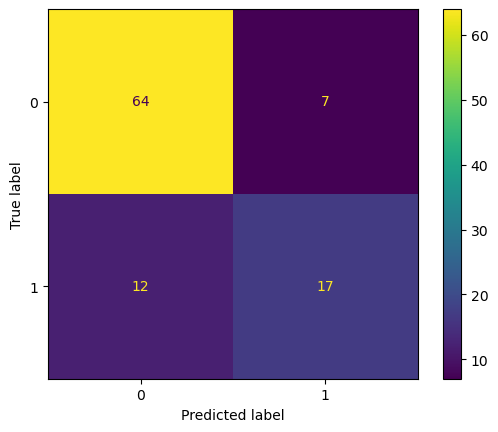

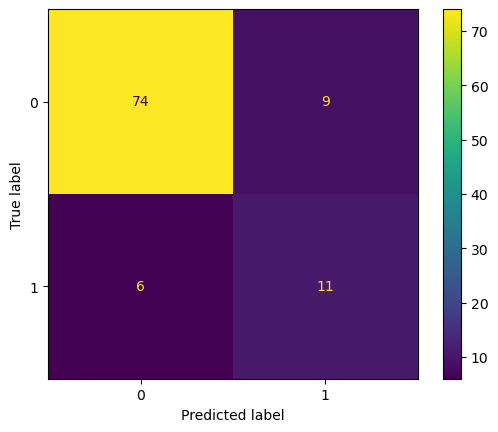

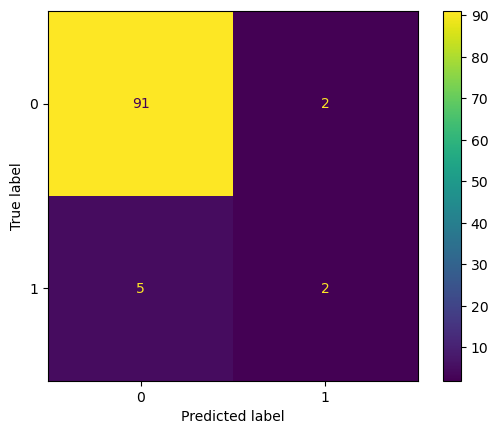

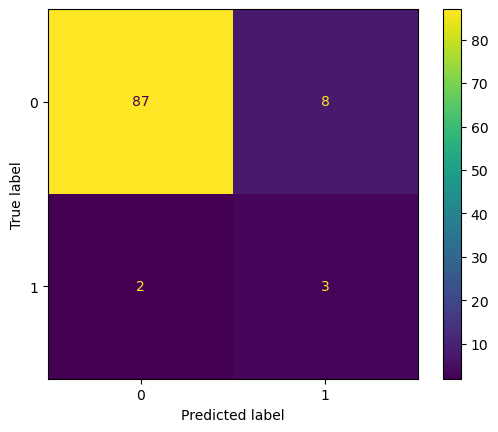

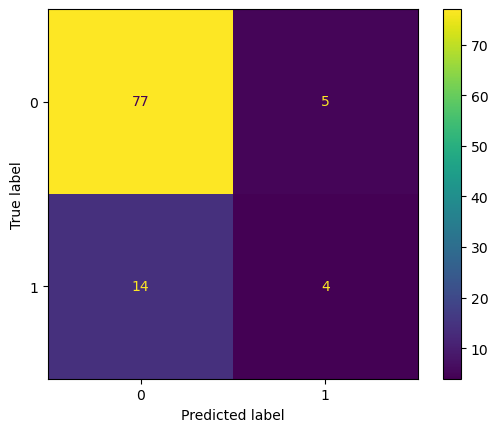

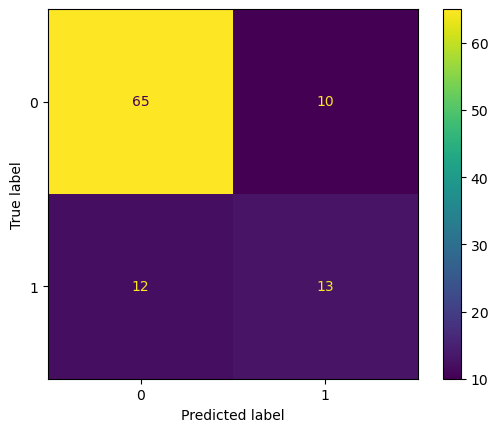

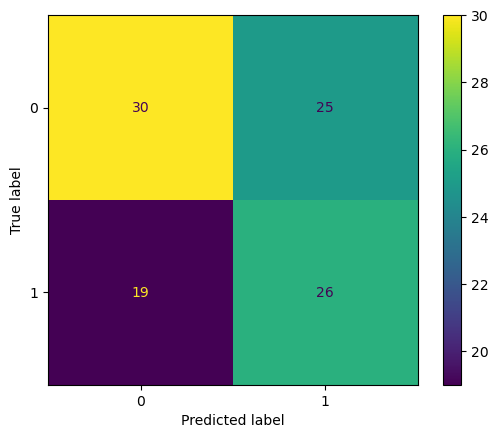

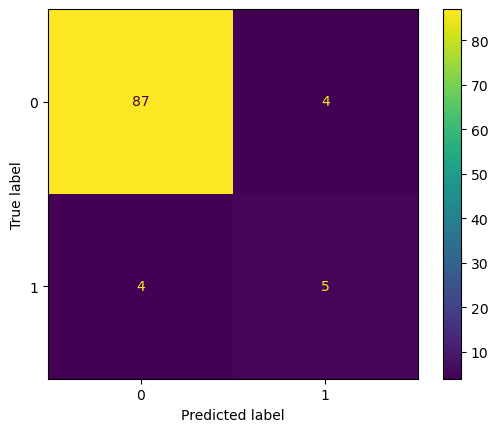

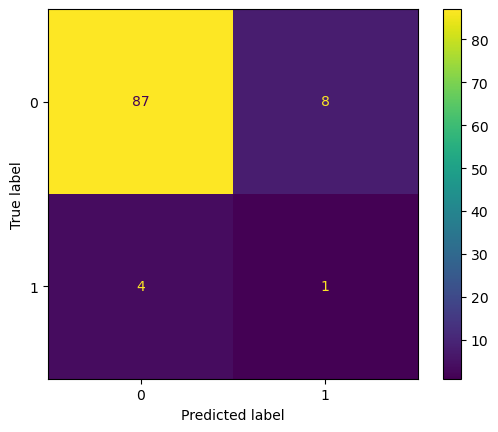

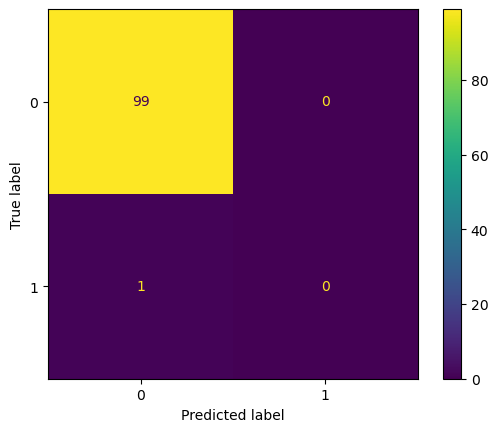

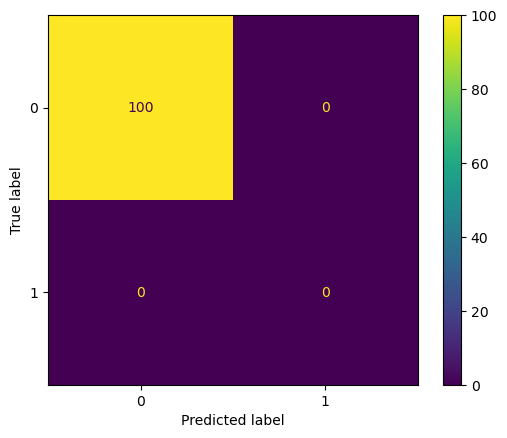

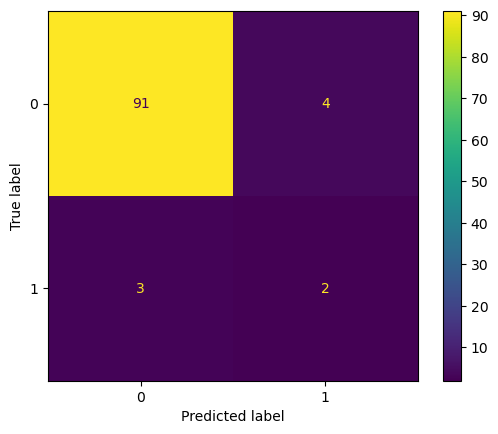

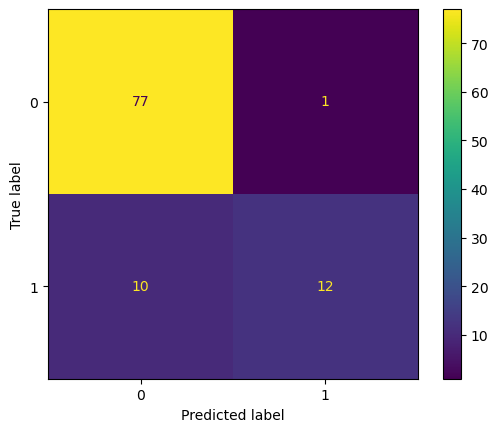

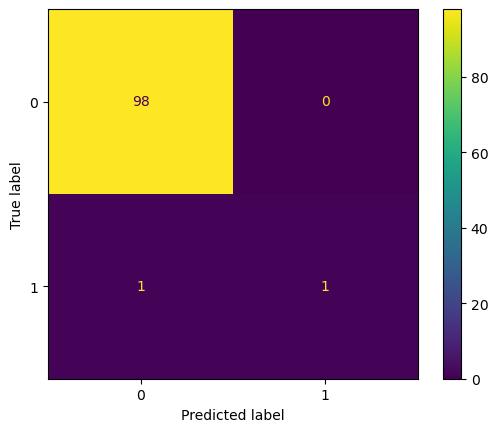

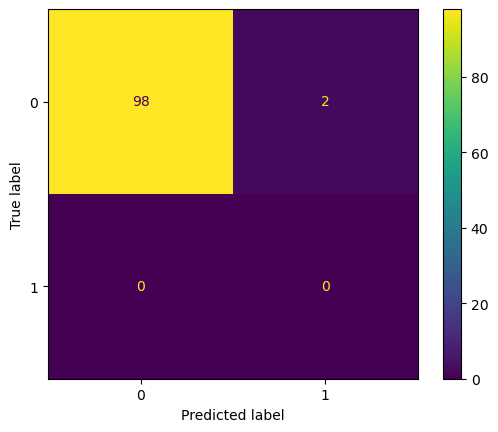

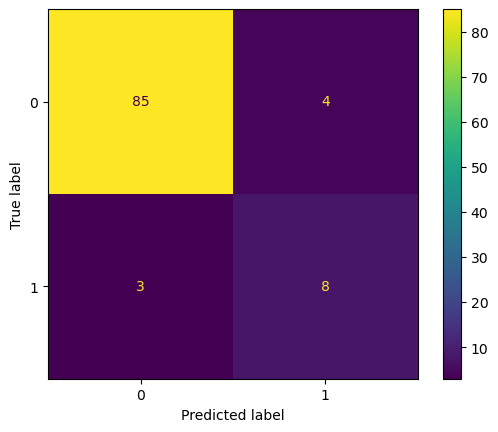

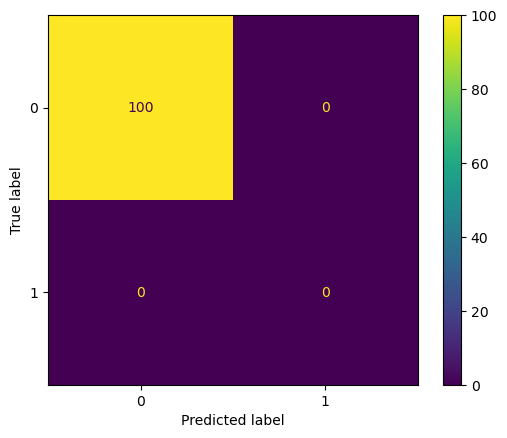

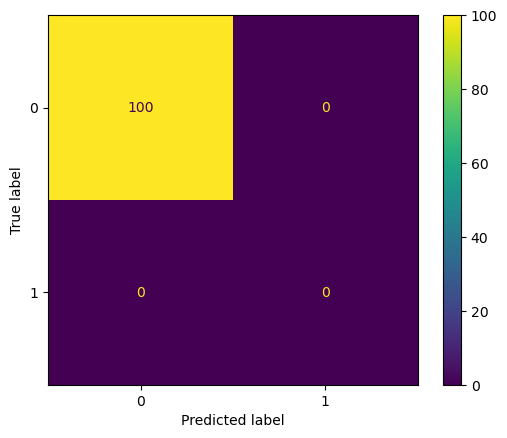

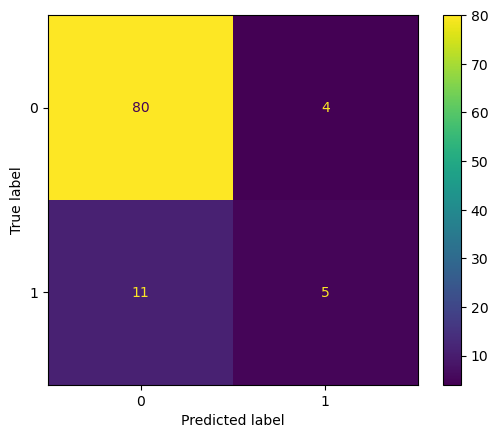

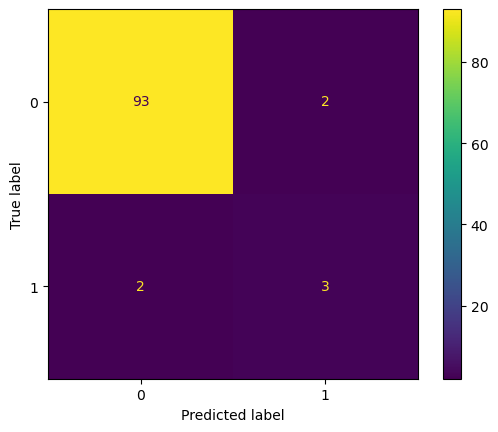

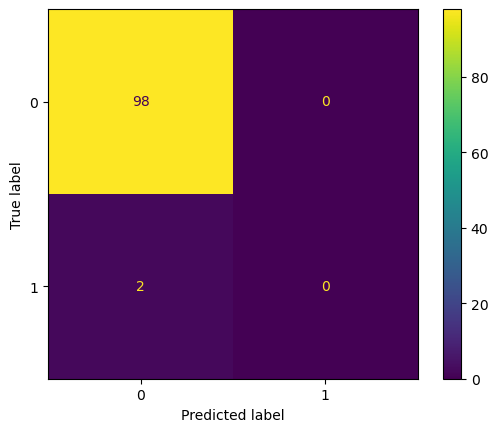

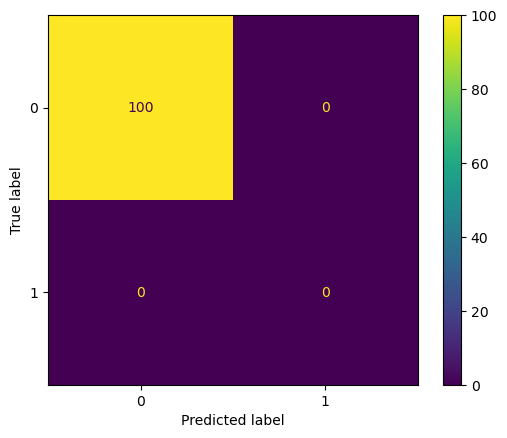

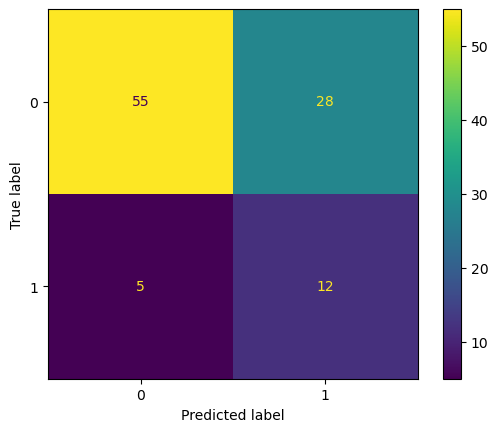

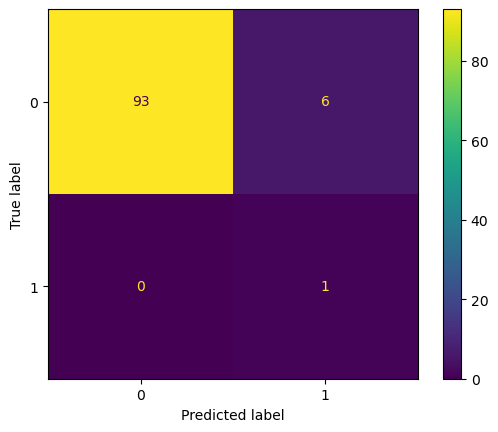

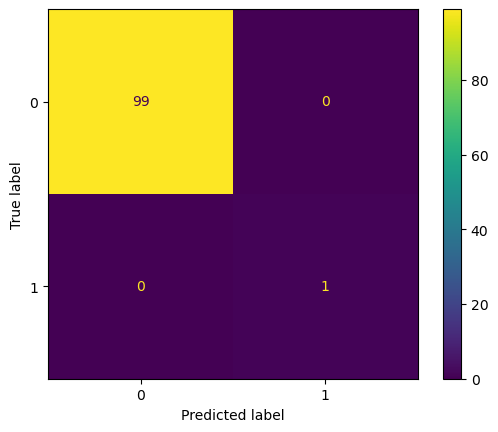

In [73]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt


cms = multilabel_confusion_matrix(y_true_vector, y_pred_vector)

for idx, cm in enumerate(cms):
    print(f"Label: {id2label[idx]}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.savefig(f"experiments/test/{id2label[idx]}.png")


In [78]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_true_vector, y_pred_vector, target_names=labels))

              precision    recall  f1-score   support

      action       0.71      0.59      0.64        29
   adventure       0.55      0.65      0.59        17
   animation       0.50      0.29      0.36         7
   biography       0.27      0.60      0.37         5
      comedy       0.44      0.22      0.30        18
       crime       0.57      0.52      0.54        25
       drama       0.51      0.58      0.54        45
      family       0.56      0.56      0.56         9
     fantasy       0.11      0.20      0.14         5
   film-noir       0.00      0.00      0.00         1
   game-show       0.00      0.00      0.00         0
     history       0.33      0.40      0.36         5
      horror       0.92      0.55      0.69        22
       music       1.00      0.50      0.67         2
     musical       0.00      0.00      0.00         0
     mystery       0.67      0.73      0.70        11
        news       0.00      0.00      0.00         0
  reality-tv       0.00    

/home/tfischer/micromamba/envs/dwts/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tfischer/micromamba/envs/dwts/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
